73.01587301587301
   position             team  played        won      drawn      lost  \
0         1        Barcelona      30  19.736842   5.526316  4.736842   
1         2  Atlético Madrid      30  13.421053  10.263158  6.315789   
2         3      Real Madrid      30  15.789474   4.736842  9.473684   
3         4          Osasuna      30  11.842105  11.842105  6.315789   
4         5   Sporting Gijón      30  12.631579   9.473684  7.894737   

   goals_for  goals_against  goal_difference     points  year  
0      0.074          0.033            0.041  50.000000  1990  
1      0.052          0.028            0.024  41.228070  1990  
2      0.063          0.037            0.026  40.350877  1990  
3      0.043          0.034            0.009  39.473684  1990  
4      0.050          0.037            0.013  38.596491  1990  
(204, 11)
position             int64
team                object
played               int64
won                float64
drawn              float64
lost               f

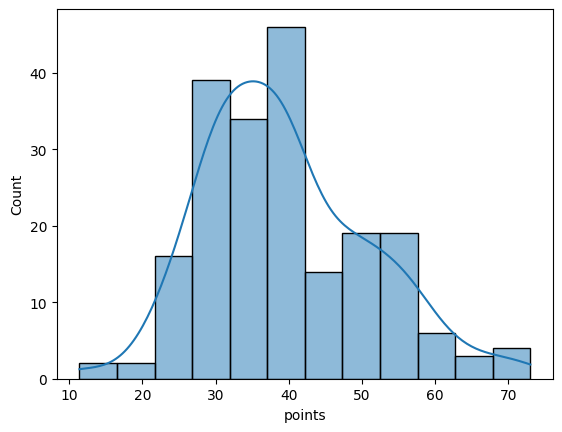

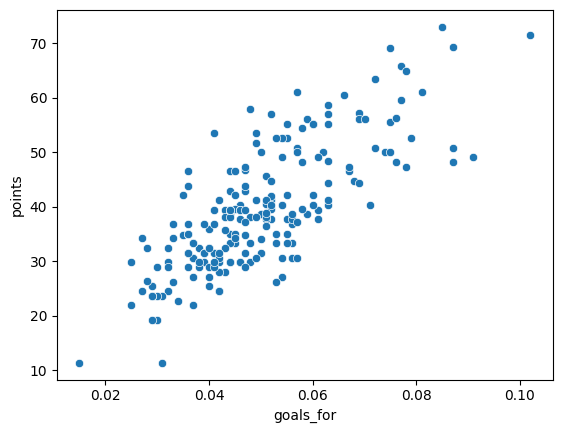

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

la_liga = pd.read_csv("../normalized_data/1990-2000.csv")






     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'drawn', 'played', 'goals_for', 'goal_difference']]

print(max(data["points"]))
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()




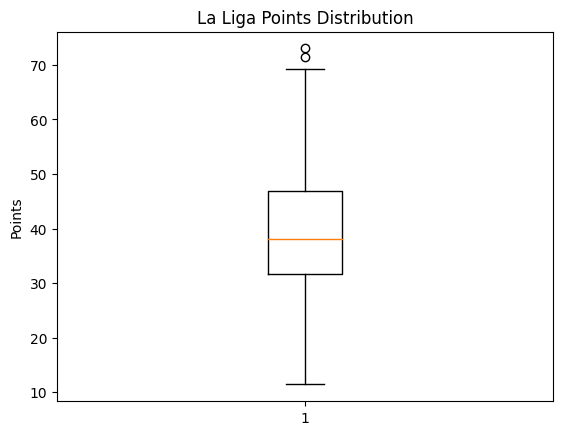

upper_bound:  70.0344611528822
lower_bound:  8.50563909774436
Outliers:
     position         team  played        won     drawn      lost  goals_for  \
122         1  Real Madrid      30  19.285714  7.857143  2.857143      0.085   
123         2    Barcelona      30  20.000000  4.285714  5.714286      0.102   

     goals_against  goal_difference     points  year  
122          0.036            0.049  73.015873  1996  
123          0.048            0.054  71.428571  1996  


In [2]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()

q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print("upper_bound: ",upper_bound)
print("lower_bound: ",lower_bound)

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

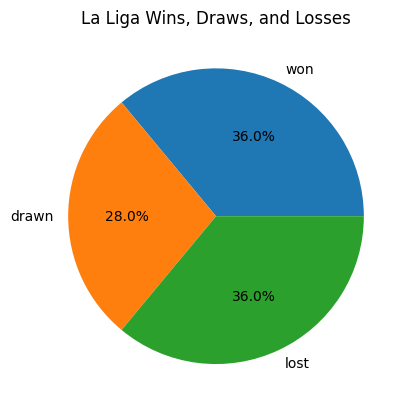

In [3]:
arr=[]
year1=1990
year2=1991
while(year1!=2000):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()

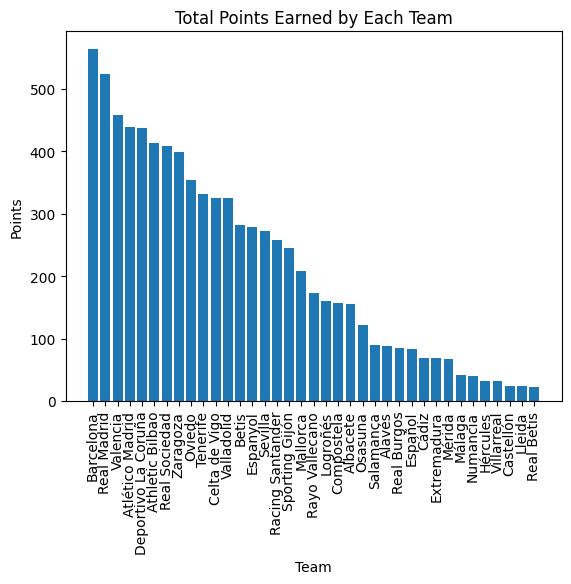

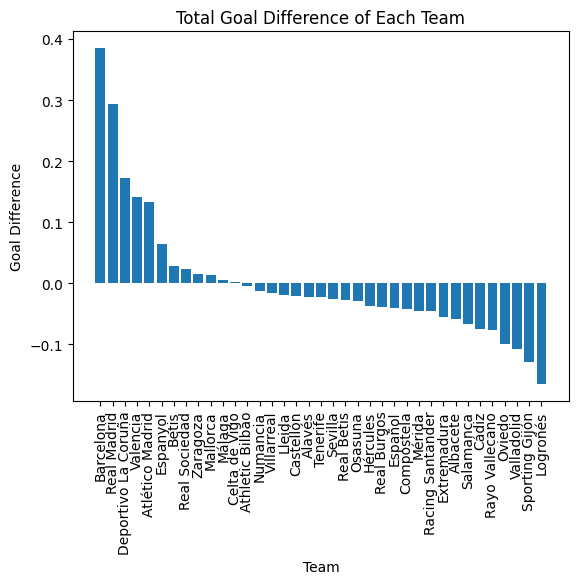

In [4]:

df = pd.read_csv("../normalized_data/1990-2000.csv")

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()
